# FB

* add a title and description what the notebook is doing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
phl_grocery = pd.read_csv('../data/PhillyNeighborhoodFoodRetail.csv')
phl_grocery.head()

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373
2,3,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466
3,4,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419
4,5,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591


In [3]:
#dimensions of dataframe
phl_grocery.shape

(1336, 16)

* In the above dataset, before any cleaning has been done, there are 1336 rows and 16 columns.
* I presume each row to represent a different neighborhood of Philadelphia County. 

In [4]:
phl_grocery.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length'],
      dtype='object')

* Each column represents a different aspect of grocery access. LPSS means low-produce grocery store, where HPSS means high produce. A LPSS would be something like a dollar store or a convenience store, where a HPSS would be a regular grocery store or a chain store like a whole foods.



* I believe that the columns are named well, but there are some that I could not gather from the metadata, such as `OBJECTID`. I gather this to mean the neighborhood where the data was taken from, but it is unclear unless placed on a map since I am not familiar with the neighborhoods just based on numbers. `Shape_Area` and `Shape_Length` are similar in this sense, but I can gather the rest of the columns and what they mean with little trouble. 

## Applying some analysis


I am going to make a few little graphs to start to make some observations about these areas and see if there is correlation, and also the percent of areas in poverty.

<AxesSubplot:title={'center':'Relationship Between Poverty and Vehicle Access in Philadelphia'}, xlabel='PCT_POVERTY', ylabel='PCT_VEHICLE_AVAILABILITY'>

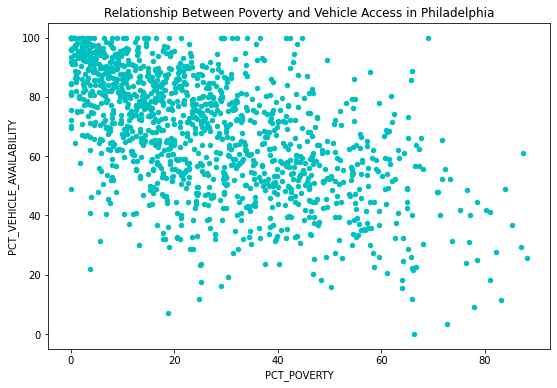

In [5]:
phl_grocery.plot.scatter(y='PCT_VEHICLE_AVAILABILITY', x = 'PCT_POVERTY',figsize = (9,6), c = 'c',
                         title = 'Relationship Between Poverty and Vehicle Access in Philadelphia')

* This plot tells us that there is generally less vehicle availability in areas of Philadelphia with higher poverty rates.

<AxesSubplot:title={'center':'Relationship Between Poverty and Amount of Low-Produce Stores in Philadelphia'}, xlabel='PCT_POVERTY', ylabel='LPSS_PER1000'>

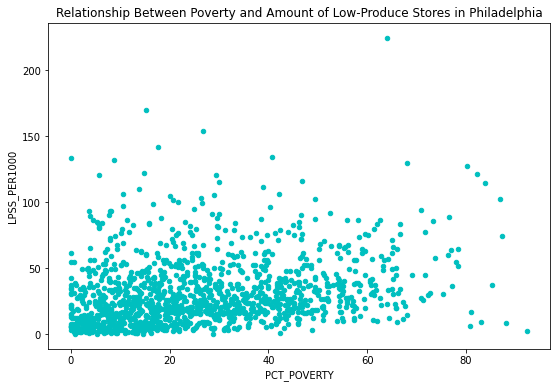

In [6]:
phl_grocery.plot.scatter(y='LPSS_PER1000', x = 'PCT_POVERTY',figsize = (9,6), c = 'c',
                         title = 'Relationship Between Poverty and Amount of Low-Produce Stores in Philadelphia')

# FB

* Use `.corr()` function as quick way to look at associations
* Seaborn `sns.regplot` will give you a regression line 

In [7]:
phl_grocery[['LPSS_PER1000', 'PCT_POVERTY']].corr()

,LPSS_PER1000,PCT_POVERTY
LPSS_PER1000,1.000000,0.262835
PCT_POVERTY,0.262835,1.000000


In [8]:
phl_grocery.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [9]:
cols_to_compare=['TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY']
phl_grocery[cols_to_compare].corr()

,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY
TOTAL_LPSS,1.000000,0.669059,0.550072,0.413635,-0.191120,-0.437042,0.371782,0.291770
LPSS_PER1000,0.669059,1.000000,0.309565,0.562254,-0.201245,-0.443616,0.135869,0.262835
TOTAL_HPSS,0.550072,0.309565,1.000000,0.807854,0.456985,-0.160510,0.397613,-0.106191
HPSS_PER1000,0.413635,0.562254,0.807854,1.000000,0.397495,-0.187566,0.227810,-0.084856
PCT_HPSS,-0.191120,-0.201245,0.456985,0.397495,1.000000,0.192329,0.110604,-0.290879
PCT_VEHICLE_AVAILABILITY,-0.437042,-0.443616,-0.160510,-0.187566,0.192329,1.000000,-0.128273,-0.571309
TOTAL_RESTAURANTS,0.371782,0.135869,0.397613,0.227810,0.110604,-0.128273,1.000000,-0.016463
PCT_POVERTY,0.291770,0.262835,-0.106191,-0.084856,-0.290879,-0.571309,-0.016463,1.000000


Text(0.5, 1.0, 'Relationship Between Poverty and Amount of Low-Produce Stores in Philadelphia')

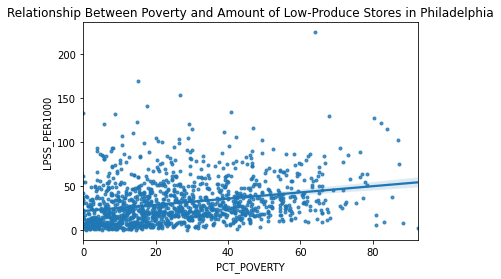

In [10]:
sns.regplot(y='LPSS_PER1000', x = 'PCT_POVERTY', marker='.',
            data=phl_grocery)

plt.title('Relationship Between Poverty and Amount of Low-Produce Stores in Philadelphia')

<AxesSubplot:title={'center':'Relationship Between Poverty and Amount of High-Produce Stores in Philadelphia'}, xlabel='PCT_POVERTY', ylabel='HPSS_PER1000'>

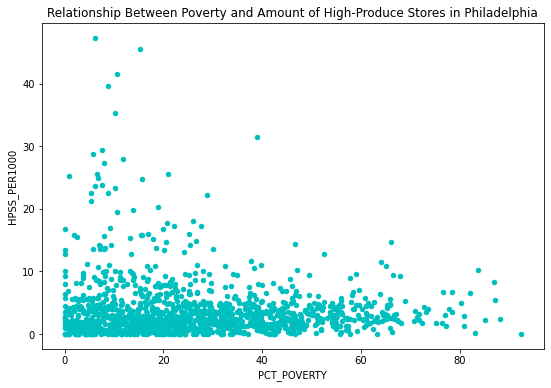

In [11]:
phl_grocery.plot.scatter(y='HPSS_PER1000', x = 'PCT_POVERTY',figsize = (9,6), c = 'c',
                         title = 'Relationship Between Poverty and Amount of High-Produce Stores in Philadelphia')

* These plots do not tell us much about access to grocery stores or stores in general, since they seem to show a cluster of data points that is consistent among all poverty levels. However, there may be an interesting observation to be made about some of the outliers in the data. The high produce outliers tend to lie among areas with lower poverty levels, where low produce outliers tend to lie among areas with higher poverty levels.
